# Exam Agenda - Q11: Clustering and Non-Linear optimisation

## (a) K-means and Mean shift
* What is clustering and why do we use it?
    * Unsupervised learning
* What is K-means?
    * Pick a k and find the clusters in that k
    * Demonstrate 2D example with 3 groups and k=3
    * Smart to combine K-means with elbow method
    * Cons and pros
        * How to pick k?
        * Where to set the initial points? Randomly?
        * "Easy" enough for 2D, but what if the dataset was 10D or 100D?
        * What about outliers?
    * Task 4 and 5: K-means on our pose dataset
* What is Mean shift?
    * Uses density to cluster groups together
    * K is not picked, but discovered
    * Initially: each point is "their own mean"
    * Compute the mean shift vector (consider using a weighted mean)
    * Shift the window to the new mean
    * Continue until the candidate doesn't move anymore or is below a small treshold. This is the "peek of the hill".
    * Cons and pros
        * K is naturally discovered
        * Simple but computational heavy
        * Handles outliers well
* Compare results from K-means (Task 5 + 6) and Mean shift (Task 8 + 9) from this exercise

## (b) K-means and Agglomerative clustering
* What is clustering and why do we use it?
    * Unsupervised learning
* What is K-means?
    * Pick a k and find the clusters in that k
    * Demonstrate 2D example with 3 groups and k=3
    * Smart to combine K-means with elbow method
    * Cons and pros
        * How to pick k?
        * Where to set the initial points? Randomly?
        * "Easy" enough for 2D, but what if the dataset was 10D or 100D?
        * What about outliers?
    * Task 4 and 5: K-means on our pose dataset
* What is Agglomerative clustering?
    * Bottom-up approach: each data point is their own clusters
    * Find most similar clusters (e.g. Euclidian distance) and merge to a parent cluster
    * Repeat until there is only one cluster
    * Result is a dendogram: indicates similarity and the order the clusters were found
    * Cons and pros
        * Flexible: you decide how to compare similarity
        * Non-numerical data
        * Easy to implement
        * Dendogram
        * Heavy runtime
        * Outliers end up in seperate small clusters
        * You still have to "pick" the number of clusters
* Compare results from K-means (Task 5 + 6) and Agglomerative clustering (Task 10 + 11 + 12) from this exercise

## (c) K-means and ELBOW
* What is clustering and why do we use it?
    * Unsupervised learning
* What is K-means?
    * Pick a k and find the clusters in that k
    * Demonstrate 2D example with 3 groups and k=3
    * Smart to combine K-means with elbow method
    * Cons and pros
        * How to pick k?
        * Where to set the initial points? Randomly?
        * "Easy" enough for 2D, but what if the dataset was 10D or 100D?
        * What about outliers?
    * Task 4 and 5: K-means on our pose dataset
* What happens when we combine K-means with the elbow method?
    * Within-Cluster Sum of Squares (WCSS)
    * Provides a way to choose the k (requires you to compute K-means for some different k, e.g. from a range of 2:30)
    * Task 6: Applying elbow method to K-means

# Clustering
This exercise involves working with K-means clustering, _Mean-shift clustering_, and _Agglomerative clustering_ on the poses data used for the exercises in week 2
 and week 10
. The task includes applying and experimenting with each method and then comparing their outcomes. The comparison will be conducted by clustering a sequence of human poses using these three methods in similar steps.
The dataset tensor contains 1403 pose sequences. Each sequence is a 100-frames time series capturing human poses. Each pose consists of 25 skeletal joints, where each joint is defined by an x and y coordinate ($25*2$). The shape of the dataset tensor is $(1403, 100, 25*2)$. For this exercise, you will use a single pose sequence of 100 frames and apply clustering to the sequence.
## Task overview
For each clustering method you will:
- Implement the method.
- Plot the clusters in the sequence.
- Plot the cluster centers.


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#loading00">Task 1: Introduction</a>
            </li>
            <li>
            <a href="#loading_files">Task 2: Setting up the data</a>
            </li>
            <li>
            <a href="#loading">Task 3: Fitting the algorithm</a>
            </li>
            <li>
            <a href="#loading2">Task 4: K-means clustering visualization</a>
            </li>
            <li>
            <a href="#loading02">Task 5: Cluster characteristics</a>
            </li>
            <li>
            <a href="#loading3">Task 6: Elbow Method</a>
            </li>
            <li>
            <a href="#loading4">Task 7: Fitting the mean-shift algorithm</a>
            </li>
            <li>
            <a href="#loading5">Task 8: Visualizing clusters</a>
            </li>
            <li>
            <a href="#loading9">Task 9: Reflection and the bandwith parameter</a>
            </li>
            <li>
            <a href="#loading10">Task 10: Dendrograms</a>
            </li>
            <li>
            <a href="#loading11">Task 11: Fitting the agglomerative clustering alg…</a>
            </li>
            <li>
            <a href="#loading12">Task 12: Agglomerative clustreing algorithm mean …</a>
            </li>
            <li>
            <a href="#loading13">Task 13: Compare and reflect on the methods</a>
            </li>
        </ul>
    </div>
</article>


---
**Task 1 (easy): Introduction💡**
This task is about understanding the data.
1. Explain the benefits of applying a clustering method to a sequence of pose data.
2. Identify possible pitfalls.


---

In [111]:
# write reflections here
"""
1. K-means: Useful for quick segmentation into common pose groups for action recognition or feature reduction.
   Mean-shift: Best for discovering natural clusters in poses, especially if transitions or unusual sequences occur.
   Agglomerative: Ideal for hierarchical or multiscale analysis of poses, capturing subtle variations across sequences.
2. K-means clustering requires a K that might not be known beforehand. 
   Mean-shift scales poorly with large datasets due to its iterative nature and high memory requirements.
   Agglomerative is irreversible. Once clusters are merged, they cannot be split again, making the algorithm 
   less flexible in correcting poor decisions.
"""

'\n1. K-means: Useful for quick segmentation into common pose groups for action recognition or feature reduction.\n   Mean-shift: Best for discovering natural clusters in poses, especially if transitions or unusual sequences occur.\n   Agglomerative: Ideal for hierarchical or multiscale analysis of poses, capturing subtle variations across sequences.\n2. K-means clustering requires a K that might not be known beforehand. \n   Mean-shift scales poorly with large datasets due to its iterative nature and high memory requirements.\n   Agglomerative is irreversible. Once clusters are merged, they cannot be split again, making the algorithm \n   less flexible in correcting poor decisions.\n'

The following cells import libraries and provide functions for plotting the poses:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from clustering_utils import *


# Suppress the specific warning
warnings.filterwarnings("ignore")


---
**Task 2 (easy): Setting up the data👩‍💻**
1. Run the cell below to load and reshape the dataset, and extract a single pose sequence of 100 frames. 
2. Choose the 100th pose sequence as the dataset.


---

In [32]:
data = np.load('poses_norm.npy')
N,T,D,C = data.shape
reshaped_data = data.reshape(N,T,D*C)
sequence = reshaped_data[99] # 100th sequence with 25 points (x ,y)
print(sequence.shape)

(100, 50)


## K-means Clustering
In this  exercise you will use k-means clustering on a pose sequence. 

---
**Task 3 (easy): Fitting the algorithm👩‍💻**
1. Run the cell below to create an instance of the `KMeans`
 class with 3 clusters and to find clusters in the sequence.


---

In [ ]:
# Specify the number of clusters (k)
k = 3 # changed from 3 to 5 after solving task 6

# Create KMeans 
kmeans = KMeans(n_clusters=k, random_state=42) # Changing the random state will change the final clusters

# Fit to the data
kmeans.fit(sequence)

KMeans(n_clusters=3, random_state=42)


---
**Task 4 (easy): K-means clustering visualization👩‍💻**
1. Use the [documentation on the `labels_`
 attribute.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
 to obtain cluster labels. 
2. Use the `plot_single_pose`
 function to color each pose in the pose sequence according to which cluster it belongs to. 


---

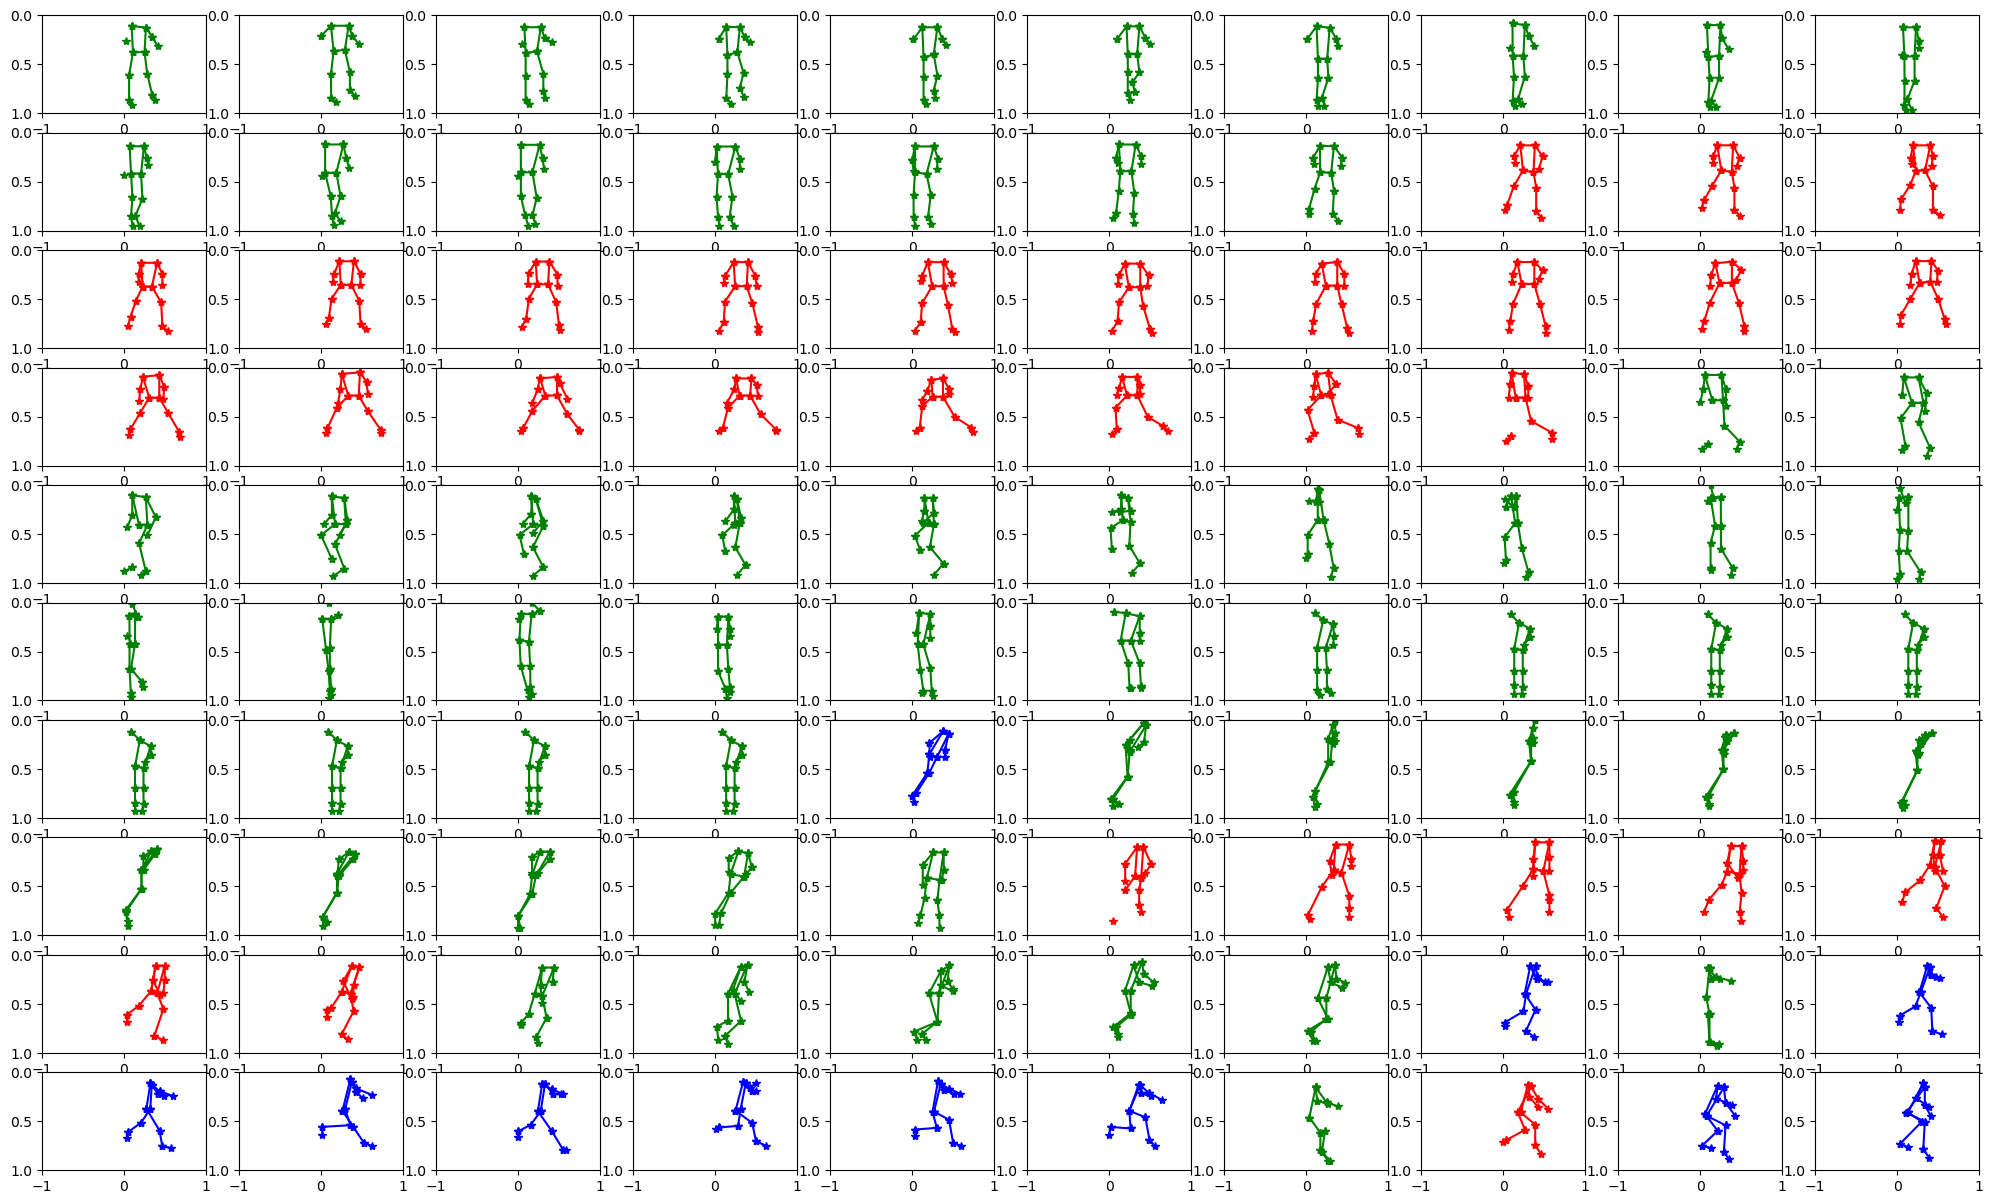

In [38]:
# Write your solution here

# You can now use 'cluster_labels' to see which cluster each frame belongs to
# 'centroids' contains the coordinates of the cluster centers

cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

colors = {0: 'red', 1: 'blue', 2: 'green', 3: "orange", 4: "black", 5: "brown", 6: "yellow", 7: "cyan"}  # Map cluster labels to colors
plt.figure(figsize=(25,15))
for i in range(len(sequence)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors[cluster_labels[i]], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)


---
**Task 5 (easy): Cluster characteristics💡**
1. Run the cell below to extract and plot the cluster centers.

2. Visually inspect the results and identify the characteristics of the poses in each cluster: 
    - What distinguishes the clusters?
    - What do the cluster centers represent?
    - What do the clusters reveal about movements?


3. Reason about the choice of 3 clusters and the effect on the result.

4. Change the random state and fit the model again. Explain whether you obtain different groupings and why? 



---

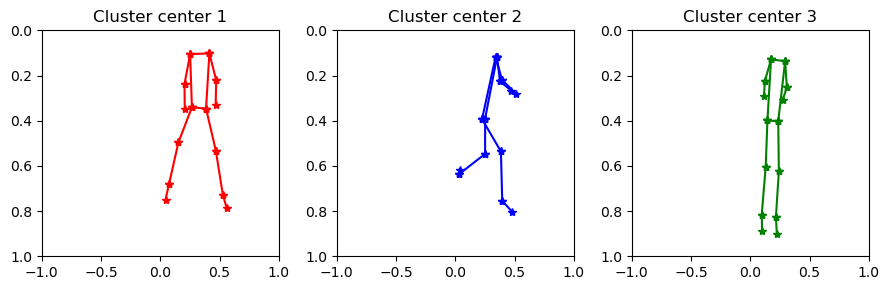

'\n2. Cluster center 1 seems to be a pose of a person standing in a "power pose" position. It seems to be a static pose.\n   Cluster center 2 seems to be a pose of a person in movement from left to right. It looks like it is a pose that is in movement.\n   Cluster center 3 seems to be a pose of a person standing with its arms bent. The pose is very rigid.\n\n3. In the three cluster centers it seems like two of the centers are quite similar (1 and 2). It might indicate that k = 2\n   could be sufficient to cluster the datapoints. It depends how fine-grained the data should be.\n   \n4. Changing the random state from 42 to 192 changes how the algorithm starts by randomly assigning the clusters centroid in the space, \n   leading it to change the cluster center from some shape to another shape. \n\n'

In [39]:
# 1
num_centroids = len(centroids)
# Set up subplots
fig, axes = plt.subplots(1, num_centroids, figsize=(num_centroids * 3, 3))

# Assuming you have a function plot_single_pose defined
for i in range(len(centroids)):
    plt.subplot(1, len(centroids), i+1)
    plt.title(f'Cluster center {i+1}')
    plot_single_pose(centroids[i], c=colors[i], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)

plt.tight_layout()
plt.show()


# write your reflection here -- these are written with k=3 and not k=5 as displayed below
"""
2. Cluster center 1 seems to be a pose of a person standing in a "power pose" position. It seems to be a static pose.
   Cluster center 2 seems to be a pose of a person in movement from left to right. It looks like it is a pose that is in movement.
   Cluster center 3 seems to be a pose of a person standing with its arms bent. The pose is very rigid.

3. In the three cluster centers it seems like two of the centers are quite similar (1 and 2). It might indicate that k = 2
   could be sufficient to cluster the datapoints. It depends how fine-grained the data should be.
   
4. Changing the random state from 42 to 192 changes how the algorithm starts by randomly assigning the clusters centroid in the space, 
   leading it to change the cluster center from some shape to another shape. 

"""


---
**Task 6 (medium): Elbow Method👩‍💻💡**
This task uses the Elbow Method to choose the number of clusters `k`
. The cell below:
- Applies k-means clustering to the sequence using each `k`
 in `k_range`
.
- Extracts the within-cluster sum of squares using [`kmeans.intertia_`
](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html)
 and stores it in a list.
- Plots the within-cluster sum of squares as a function of the number of clusters (elbow curve as displayed below) 

1. Visually determine the optimal number of clusters.

2. Calculate the rate of change for the elbow curve and plot its absolute value. Use the curve to determine the optimal `k`
.

3. Revisit and run the previous tasks ([Task 3](#loading), [Task 4](#loading2) and [Task 5](#loading02) ) with the optimal number of clusters. 

4. How does the elbow method influence the results in the previous tasks?



---

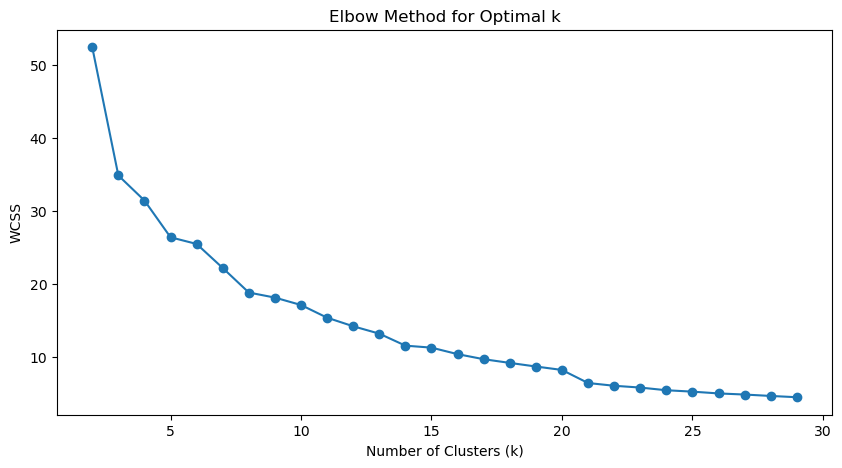

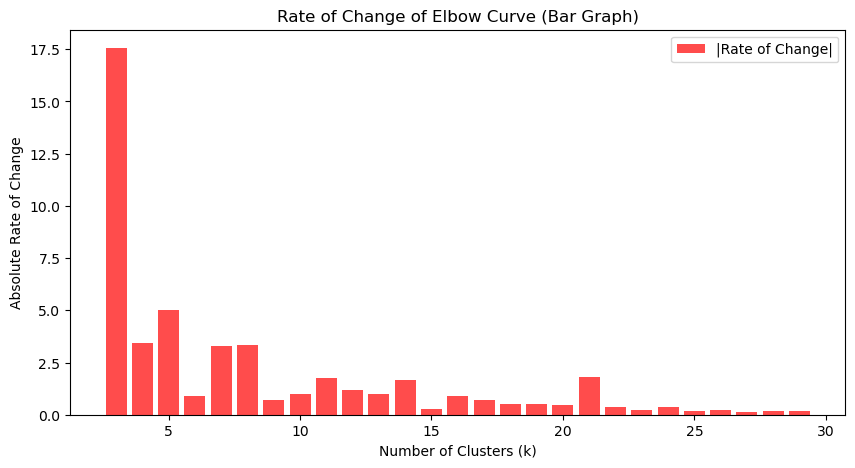

In [21]:
# Find the optimal k using the elbow method
# NOTE: k_range starts at 2! Meaning that the first "o" in the plot is k=2
k_range = range(2, 30) # values for the number of clusters `k`
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sequence)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

rate_of_change = np.diff(inertia)

# Plot the absolute value of the rate of change
plt.figure(figsize=(10, 5))
plt.bar(k_range[1:], np.abs(rate_of_change), color='red', alpha=0.7, label='|Rate of Change|')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Absolute Rate of Change')
plt.title('Rate of Change of Elbow Curve (Bar Graph)')
plt.legend()
plt.show()

In [118]:
# Write your reflections here...

"""
1. The optimal solution of number of clusters based on the elbow method looks like it is 5. 
   (Although this is not the best graph for the elbow method)

2. The rate of change in the elbow curve refers to how much the inertia (WCSS - within-cluster sum of squares) 
   changes as the number of clusters k increases.
   An optimal k based on the rate of change could be 3 or 5, depending on the task.

3. k = 5, random_state = 42

4. The elbow method influenced us to increase the k = 5, leading to more variety in the cluster centers.

"""

'\n1. The optimal solution of number of clusters based on the elbow method looks like it is 5. \n   (Although this is not the best graph for the elbow method)\n\n2. The rate of change in the elbow curve refers to how much the inertia (WCSS - within-cluster sum of squares) \n   changes as the number of clusters k increases.\n   An optimal k based on the rate of change could be 3 or 5, depending on the task.\n\n3. k = 5, random_state = 42\n\n4. The elbow method influenced us to increase the k = 5, leading to more variety in the cluster centers.\n\n'

## Mean-shift Clustering
This exercise is about applying mean-shift clustering to the sequence of human poses. 

---
**Task 7 (easy): Fitting the mean-shift algorithm👩‍💻**
1. Run the cell below to:    - create an instance of the `MeanShift()`
 class with a bandwith of 0.629 
    - cluster the pose sequence.




---

In [25]:
# Perform Mean Shift clustering
mean_shift = MeanShift(bandwidth=0.97)
mean_shift.fit(sequence)

MeanShift(bandwidth=0.97)


---
**Task 8 (easy): Visualizing clusters👩‍💻**
1. Extract the cluster labels for each pose in the sequence. Use the `labels_`
 attribute as described in the [documentation on mean-shift clustering.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)

2. Visualize the pose sequence, assigning a distinct color to each pose based on its cluster.
3. Extract and plot the cluster centers using the `cluster_centers_`
 attribute.


---

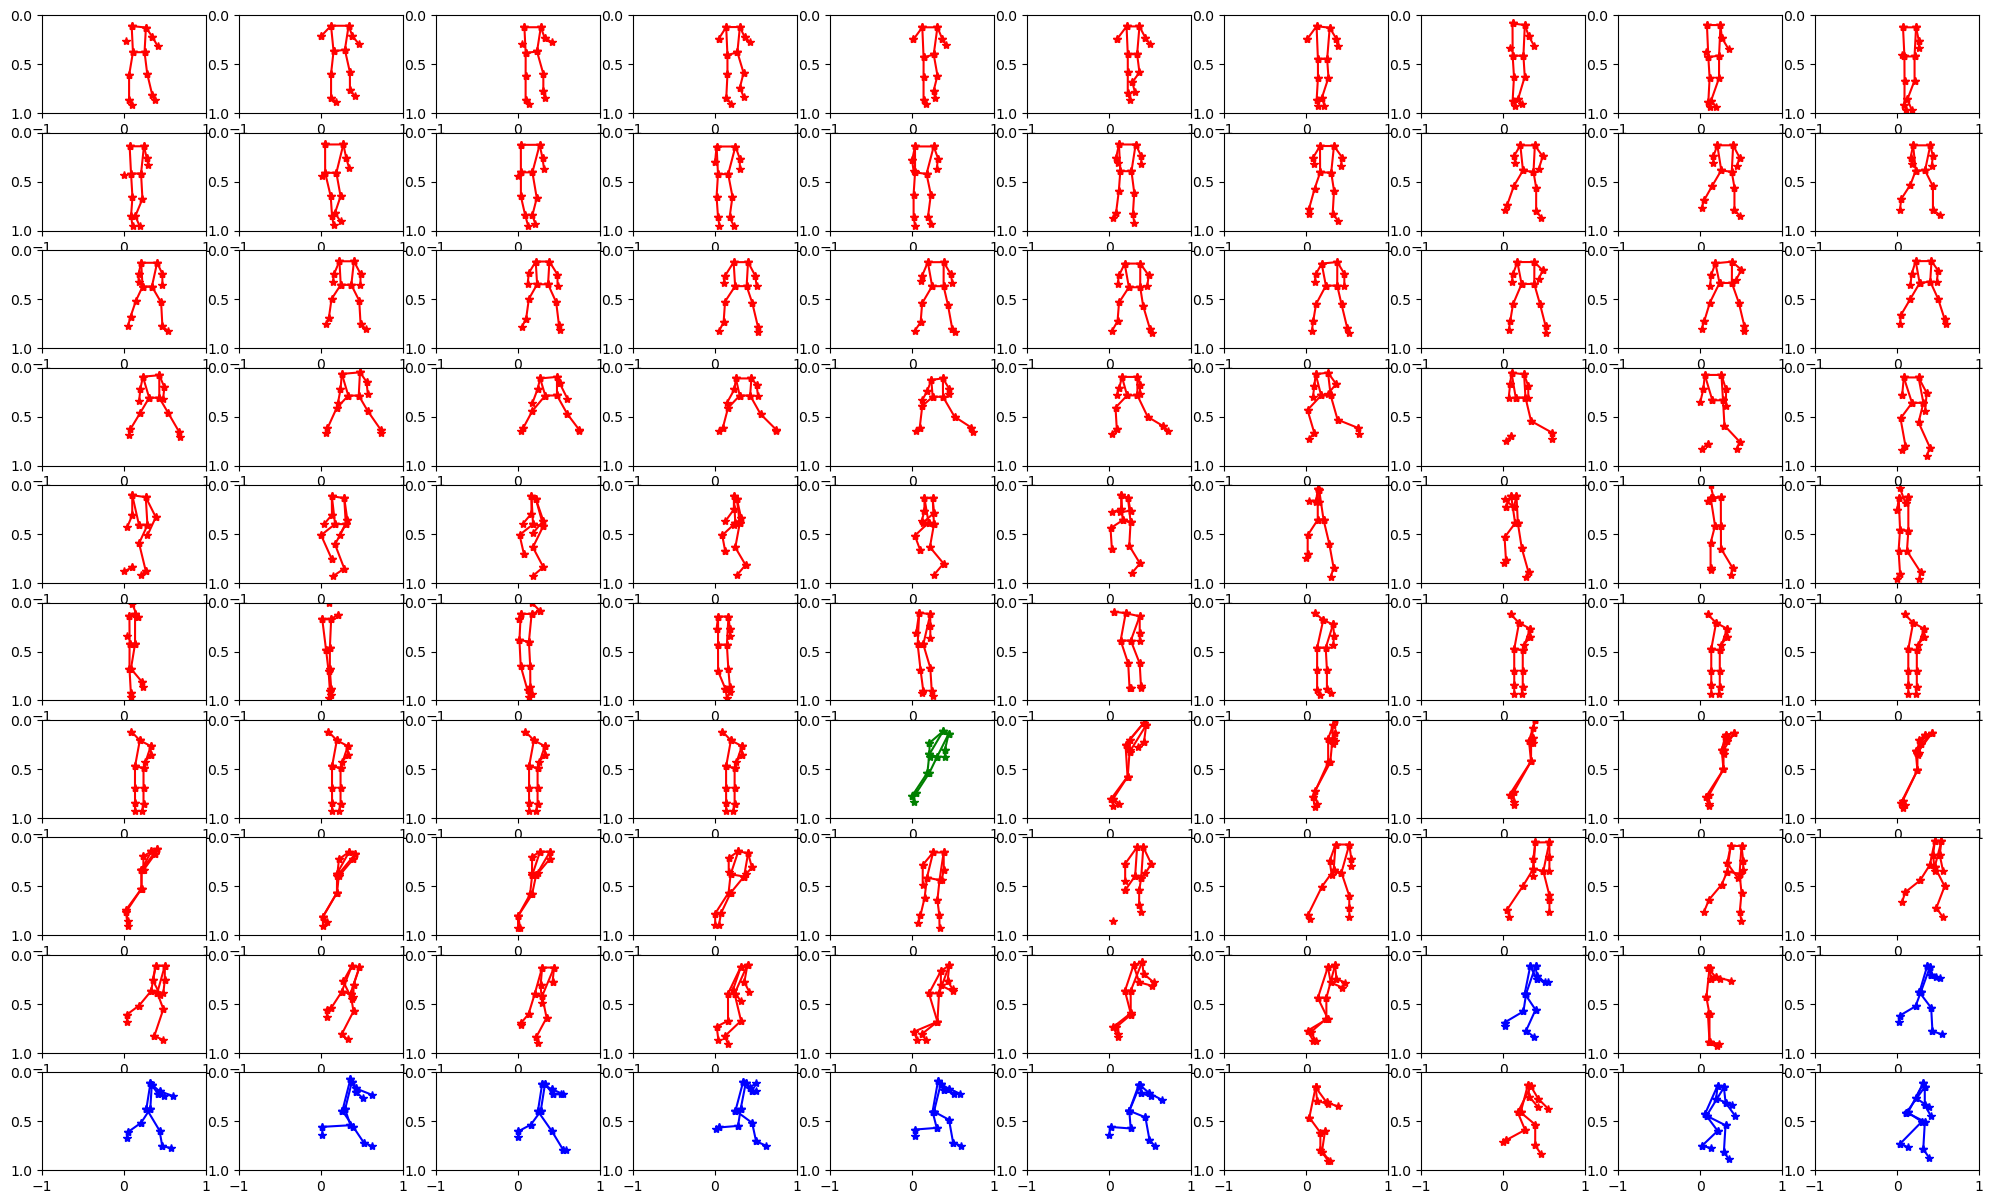

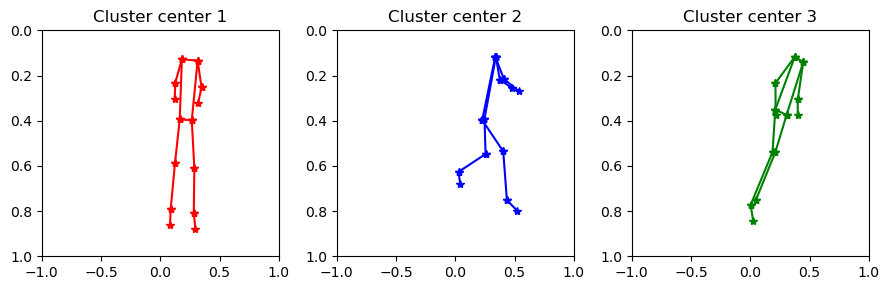

In [26]:
# Write your solution here

cluster_labels = mean_shift.labels_
centroids = mean_shift.cluster_centers_

colors = {0: 'red', 1: 'blue', 2: 'green', 3: "orange", 4: "black", 5: "brown", 6: "yellow", 7: "cyan", 8: "pink", 9: "purple"}  # Map cluster labels to colors
plt.figure(figsize=(25,15))
for i in range(len(sequence)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors[cluster_labels[i]], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)

num_centroids = len(centroids)
# Set up subplots
fig, axes = plt.subplots(1, num_centroids, figsize=(num_centroids * 3, 3))

# Assuming you have a function plot_single_pose defined
for i in range(len(centroids)):
    plt.subplot(1, len(centroids), i+1)
    plt.title(f'Cluster center {i+1}')
    plot_single_pose(centroids[i], c=colors[i], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)

plt.tight_layout()
plt.show()


---
**Task 9 (easy): Reflection and the bandwith parameter👩‍💻💡**
1. Visually examine the plots. What are the characteristics of the poses belonging to each cluster?
2. What effect does decreasing and increasing the bandwidth parameter by 0.2 (0.829 / 0.429) have and why?


**Info**
You might encounter longer run times for lower bandwith values.


---

In [27]:
# Write your solution here

"""

1. The characteristic of the poses in each cluster are different compared to eachother. Using k-means we saw that cluster 1 and 3 were quite similar.
2. The bandwidth will effect how many different clusters there are. 
   Increasing the bandwith: This will lower the amount of different clusters. This is because each point now considers more points around it.
   Decreasing the bandwith: This will increase the amount of different clusters. This is because each point now considers less points around it.
   The bandwith can be thought of as the "window" that the algorithm uses to group points together.
"""

'\n\n1. The characteristic of the poses in each cluster are different compared to eachother. Using k-means we saw that cluster 1 and 3 were quite similar.\n2. The bandwidth will effect how many different clusters there are. \n   Increasing the bandwith: This will lower the amount of different clusters. This is because each point now considers more points around it.\n   Decreasing the bandwith: This will increase the amount of different clusters. This is because each point now considers less points around it.\n   The bandwith can be thought of as the "window" that the algorithm uses to group points together.\n'

## Agglomerative Clustering
This exercise is about applying hierarchical clustering to the human poses dataset.

---
**Task 10 (easy): Dendrograms👩‍💻💡**
1. Run the cell below to generate a dendrogram. 
2. How many clusters would result from setting the distance threshold to: 0.5, 1.5, 3.0, 4?
3. What types of relationships can agglomerative clustering reveal that non-hierarchical methods might miss?


---

'\n2. 0.5 = alot (almost all of them okayyy)\n   1.5 = ~12\n   3.0 = 4\n   4   = 3\n\n3. Agglomerative clustering excels at uncovering hierarchical, nested, or fine-grained structures, identifying outliers, \n   and visualizing relationships across multiple scales. \n   Non-hierarchical methods, while efficient, provide flat partitions and are less informative in datasets with intricate \n   or multi-level clustering relationships.\n   \n   The graph also provides insight in how/what index poses are grouped together (the x-axis)\n'

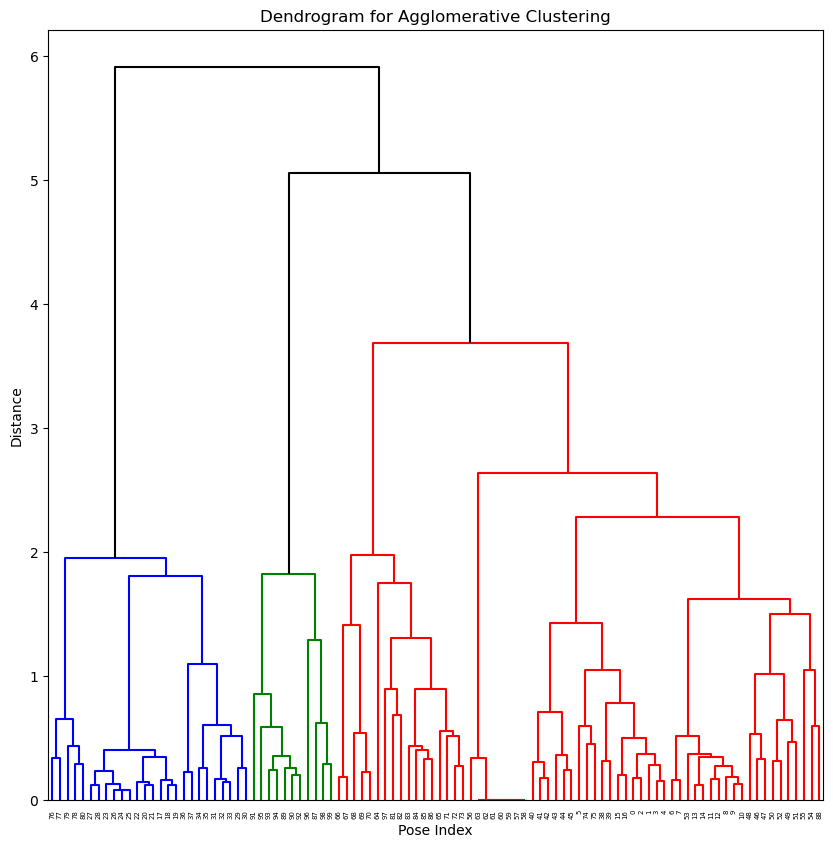

In [ ]:
colors = {0: 'black', 1: 'blue', 2: 'green', 3: 'red'}
sns.set_palette([colors[i] for i in range(len(colors))])
shc.set_link_color_palette(None)
plt.figure(figsize=(10,10))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Pose Index')
plt.ylabel('Distance')
linkage_matrix = shc.linkage(sequence, method ='ward', metric="euclidean")
Dendrogram = shc.dendrogram(linkage_matrix)


"""
2. 0.5 = alot (almost all of them okayyy)
   1.5 = ~12
   3.0 = 4
   4   = 3

   ^This is us using the dendogram to draw a horizontal line through the dendogram and see how many clusters that would lead to.
    Drawing a horizontal line a distance 4 would give us 3 clusters.

3. Agglomerative clustering excels at uncovering hierarchical, nested, or fine-grained structures, identifying outliers, 
   and visualizing relationships across multiple scales. 
   Non-hierarchical methods, while efficient, provide flat partitions and are less informative in datasets with intricate 
   or multi-level clustering relationships.
   The graph also provides insight in how/what index poses are grouped together (the x-axis).
   A agglomerative clustering can also handle arbitrary shapes (non-numerical data for instance). This is not something the other two can handle.

   The dendogram below shows the orde the clusters were formed: the smaller the "height" of a cluster, the earlier it was formed.
"""


---
**Task 11 (easy): Fitting the agglomerative clustering algorithm👩‍💻**
The cell below creates an instance of the `AgglomerativeClustering()`
 class. The [documentation on agglomerative clustering is given here.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

1. Select the distance threshold that results in 3 clusters, then apply agglomerative clustering on the sequence. 
2. Extract the cluster labels for each pose in the sequence.
3. Visualize the pose sequence by assigning a distinct color to each pose based on its cluster.


---

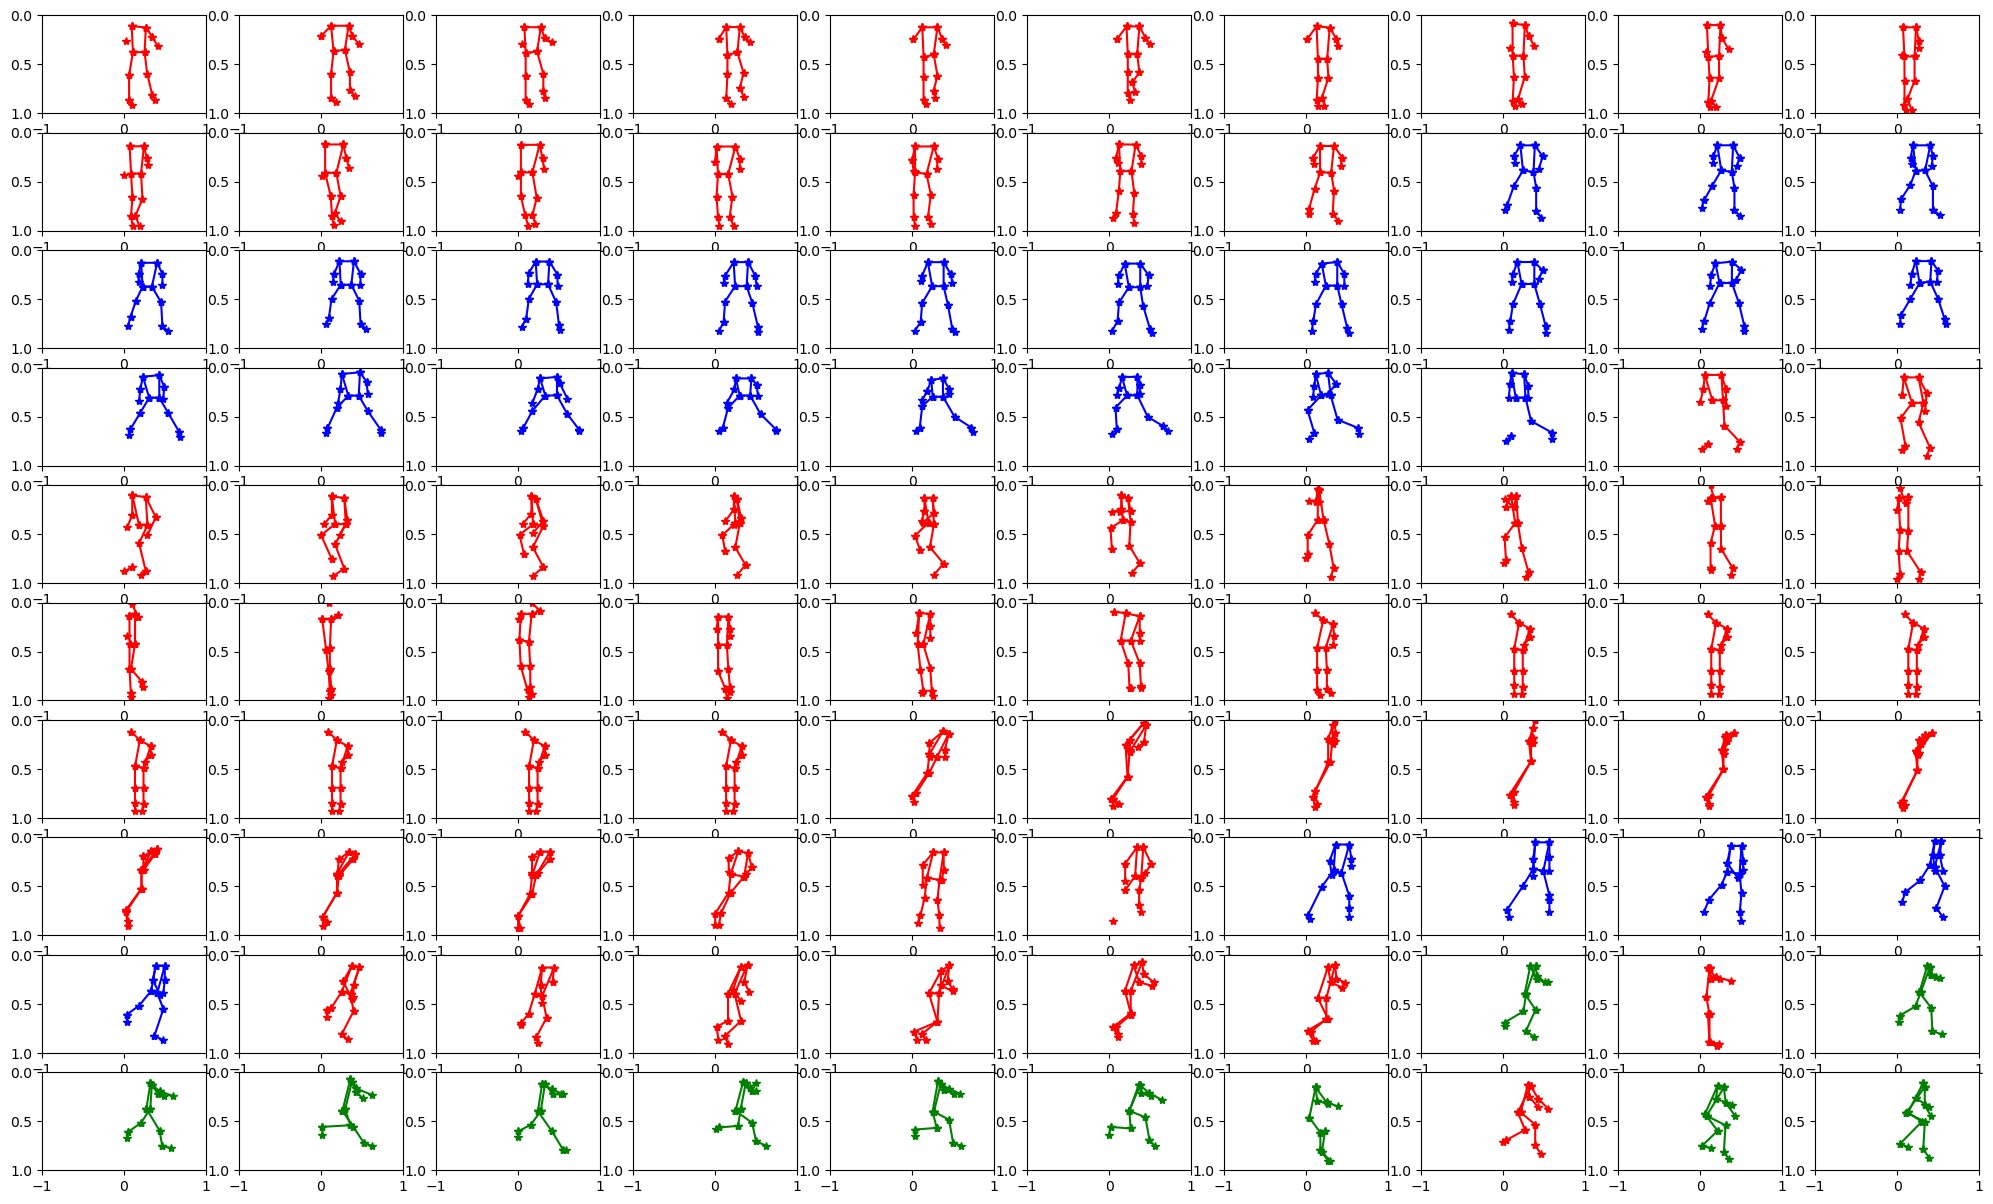

In [28]:

# Write your solution here (agglomerative clustering and cluster centers)
# AgglomerativeClustering with k=3
agg_clustering = AgglomerativeClustering(metric='euclidean', linkage='ward', distance_threshold=4, compute_full_tree=True, n_clusters=None)
agg_clustering.fit(sequence)

# Extract cluster labels
cluster_labels = agg_clustering.labels_

colors = {0: 'red', 1: 'blue', 2: 'green', 3: "orange", 4: "black", 5: "brown", 6: "yellow", 7: "cyan", 8: "pink", 9: "purple"}  # Map cluster labels to colors
plt.figure(figsize=(25,15))
for i in range(len(sequence)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors[cluster_labels[i]], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)




---
**Task 12 (easy): Agglomerative clustreing algorithm mean pose👩‍💻**
1. The `AgglomerativeClustering()`
 class does not have an attribute or a method for directly extracting cluster centers. Calculate the mean pose within each cluster for $k = 3$  and plot it.
2. Change the distance metric (try `l1`
 and `cosine`
) and repeat the previous two tasks ([Task 10](#loading10), [Task 11](#loading11) and [Task 12](#loading12).1). 
3. What differences do you observe, and can you explain why these differences occur? Does a different distance metric result in more meaningful clusters?


---

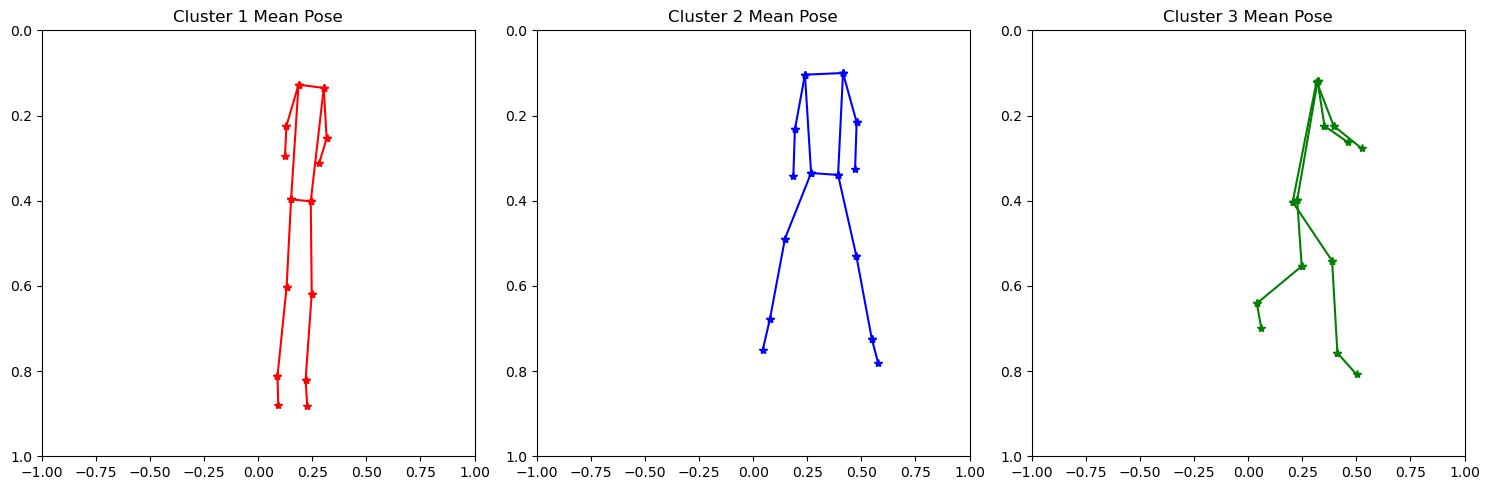

'\n\n3. We observe that the clusters change as well as the cluster centers. \n   When changing the metric from euclidian to i.e. l1, we had to change the linkage and use n_clusters instead of the distance_threshold.\n   Same goes for cosinus.\n\n   As we are working with (x,y) coordinates, euclidian distance is a meaningful metric to use.\n\n'

In [29]:
# Write your solution here
import numpy as np

# Calculate mean pose for each cluster
mean_poses = []
for cluster_id in range(3):
    # Get all poses belonging to the current cluster
    cluster_poses = sequence[cluster_labels == cluster_id]
    # Compute the mean pose for the cluster
    mean_pose = np.mean(cluster_poses, axis=0)
    mean_poses.append(mean_pose)

mean_poses = np.array(mean_poses)  # Convert to NumPy array for easy manipulation

# Step 4: Plot the mean poses
plt.figure(figsize=(15, 5))
colors = ['red', 'blue', 'green']  # Colors for the three clusters
for i, mean_pose in enumerate(mean_poses):
    plt.subplot(1, 3, i + 1)
    plot_single_pose(mean_pose, c=colors[i], head=False)  # Assuming plot_single_pose is defined
    plt.ylim(1, 0)
    plt.xlim(-1, 1)
    plt.title(f'Cluster {i + 1} Mean Pose')

plt.tight_layout()
plt.show()

"""

3. We observe that the clusters change as well as the cluster centers. 
   When changing the metric from euclidian to i.e. l1, we had to change the linkage and use n_clusters instead of the distance_threshold.
   Same goes for cosinus.

   As we are working with (x,y) coordinates, euclidian distance is a meaningful metric to use.

"""


## Comparison

---
**Task 13 (medium): Compare and reflect on the methods👩‍💻💡**
1. Compare the clustered poses obtained with the different clustering methods (K-means, Mean-shift and Agglomerative clustering). What are the similarities and differences between the pose clusters across methods?
2. Why can clusters look similar across methods? 
3. What are the main reasons behind differences in the clusters?
4. The algorithms use different methods for determining the number of clusters. How do these differences impact the results for the pose data?


---

In [ ]:
# write your relfection here

"""

1. Mean-shift has one different cluster center compared to the other two methods. Otherwise the center poses are quite similar.
2. Because it's all different methods that find similarities in the dataset and group it together. It basically serves the same purpose, but with
   some different methods.
3. k-means sets the number of clusters from beginning to determine clusters.
   mean-shift uses a bandwith to determine what the number of clusters will end up being.
   agglomerative gives a dendogram that describes the different clusters.
4. for k-mean we use elbow with k = 5
   in mean-shift we used a bandwith of 0.629 leading to 10 different clusters
   in agglomorative we chose the distance-threshold to be 4 leaading to 3 clusters

Additional note:
   Taking this all into account it is also important to consider the computational cost of the different methods.
   Mean-shift is computationally expensive, especially with large datasets. Recall the size of the full dataset (1403, 100, 25*2); which was 1403 sequences of 100 poses of 50 (x,y) coordinates, it would be a
   very large dataset to work with. Agglomerative clustering is also computationally expensive.
   I believe there is a reason behind that we were supposed to only work with a single sequence of 100 poses and not all 1403 sequence.

   I would probably advice to use k-means on the whole dataset and then use the elbow method to determine the number of clusters. But it always depends on the task at hand, and what you want to achieve.

"""